In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import matplotlib.lines as mlines

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [2]:

times = np.linspace(0,1,100)
Omega=40

coupling_Hamiltonian = Omega*0.5*(qt.projection(4,0,1) + qt.projection(4,1,0) + qt.projection(4,2,1) + qt.projection(4,1,2))

detuning_p = Omega*qt.projection(4,1,1)

detuning = Omega*qt.projection(4,2,2)

c_ops = np.sqrt(10)*qt.projection(4,3,1)

In [11]:
"""
Stray detunings:
"""

resolution = 101
extent_p = np.linspace(-2.5,2.5, resolution)
extent = np.linspace(-0.15, 0.15, resolution)
init_state = qt.fock_dm(4,0,0)
performances = np.zeros((2,resolution, resolution, len(times), 4))
for i, n in enumerate(extent_p):
    for j, m in enumerate(extent):
        stray_dp = n
        stray_d = m
        """
        Protocol 1:
        """
        def delta_p1(t, args={}):
            val =  5.11 + 0.038*np.exp(21.52*(t - 0.5)**2)
            return val + stray_dp
        def delta1(t, args={}):
            val = 0.29*(t - 0.5)
            return val + stray_d
        """
        Protocol 2:
        """
        def delta_p2(t, args={}):
            val = 26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5 
            return val + stray_dp

        def delta2(t, args={}):
            val = 0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4 
            return val + stray_d
        
        
        results1 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]],
                             rho0=init_state, tlist=times, c_ops=c_ops)
        
        results2 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p2],[detuning, delta2]],
                             rho0=init_state, tlist=times, c_ops=c_ops)
        for k in range(len(times)):
            performances[0,i,j,k,:] = results1.states[k].diag()[:]
            performances[1,i,j,k,:] = results2.states[k].diag()[:]

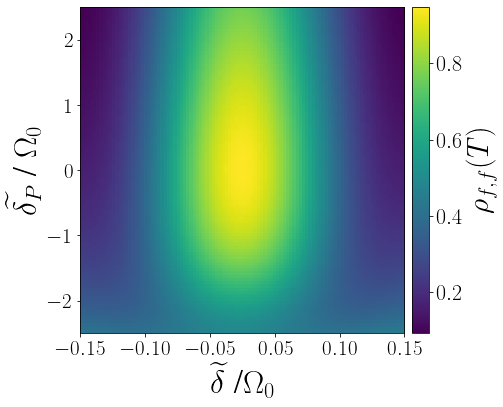

In [12]:
fig, ax = plt.subplots(1,1, figsize=(7,6))
img1 = plt.imshow(performances[0,:,:,-1,-2], origin = "lower", extent = [0,1,-2.5,2.5],aspect='auto')
plt.ylabel(r"$\widetilde{\delta_P}$ / $\Omega_0$", fontsize="32")
plt.xlabel(r"$\widetilde{\delta}$ /$\Omega_0$", fontsize="32")



ax.tick_params(axis='both', labelsize='21')

cb = plt.colorbar(img1, orientation="vertical", pad=0.02)
cb.set_label(label=r"$\rho_{f,f}(T)$", size='30')
ax.set_xticklabels(["$-0.15$", "$-0.10$", "$-0.05$", "$0.05$", "$0.10$", "$0.15$"])
cb.ax.tick_params(labelsize='22')

plt.savefig("Plots/robustness_proto1_short",dpi=600, bbox_inches = "tight")

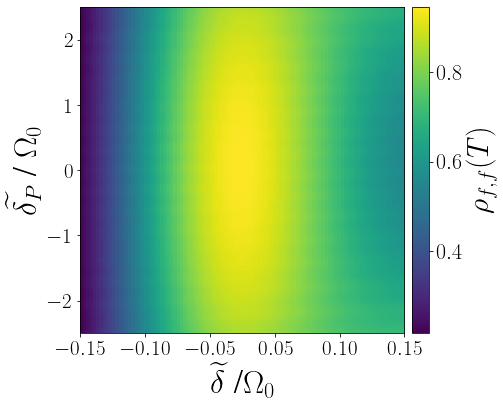

In [13]:
fig, ax = plt.subplots(1,1, figsize=(7,6))
img1 = plt.imshow(performances[1,:,:,-1,-2], origin = "lower", extent = [0,1,-2.5,2.5],aspect='auto')
plt.ylabel(r"$\widetilde{\delta_P}$ / $\Omega_0$", fontsize="32")
plt.xlabel(r"$\widetilde{\delta}$ /$\Omega_0$", fontsize="32")



ax.tick_params(axis='both', labelsize='21')

cb = plt.colorbar(img1, orientation="vertical", pad=0.02)
cb.set_label(label=r"$\rho_{f,f}(T)$", size='30')
ax.set_xticklabels(["$-0.15$", "$-0.10$", "$-0.05$", "$0.05$", "$0.10$", "$0.15$"])
cb.ax.tick_params(labelsize='22')
plt.savefig("Plots/robustness_proto2short",dpi=600, bbox_inches = "tight")

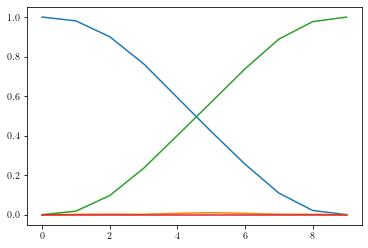

In [16]:
plt.plot(performances[0,5,5,:,0])
plt.plot(performances[0,5,5,:,1])
plt.plot(performances[0,5,5,:,2])
# Define the protocols functional form of the detunings for each protocol


plt.plot(performances[0,5,5,:,3])

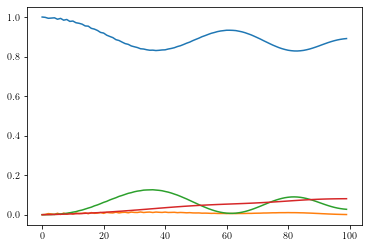

In [54]:
"""
Protocol 1:
"""
def delta_p1(t, args={}):
    val =  5.11 + 0.038*np.exp(21.52*(t - 0.5)**2)
    return val + 0.5
def delta1(t, args={}):
    val = 0.29*(t - 0.5)
    return val + 0.3


"""
Protocol 2:
"""
def delta_p2(t, args={}):
    val = 26.50*(t - 0.5) - 87.25*(t - 0.5)**3 + 312.08*(t - 0.5)**5 
    return val + 0.5

def delta2(t, args={}):
    val = 0.19 - 0.37*(t - 0.5)**2 - 4.85*(t - 0.5)**4 
    return val + 0.3

times = np.linspace(0,1,100)
Omega=40

coupling_Hamiltonian = Omega*0.5*(qt.projection(4,0,1) + qt.projection(4,1,0) + qt.projection(4,2,1) + qt.projection(4,1,2))

detuning_p = Omega*qt.projection(4,1,1)

detuning = Omega*qt.projection(4,2,2)





c_ops = np.sqrt(10)*qt.projection(4,3,1)

results1 = qt.mesolve(H = [coupling_Hamiltonian, [detuning_p, delta_p1],[detuning, delta1]],
                             rho0=init_state, tlist=times, c_ops=c_ops)
results2 = qt.mesolve(H = [coupling_Hamiltonian,[detuning_p, delta_p2],[detuning, delta2]],
                             rho0=init_state, tlist=times, c_ops=c_ops)

population1 = np.zeros((len(times), 4))
population2 = np.zeros((len(times), 4))
for i in range(len(times)):
    population1[i,:] = results1.states[i].diag()[:]
    population2[i,:] = results2.states[i].diag()[:]
    
plt.plot(population1[:,0])
plt.plot(population1[:,1])
plt.plot(population1[:,2])
plt.plot(population1[:,3])


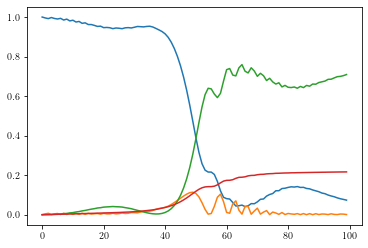

In [55]:
plt.plot(population2[:,0])
plt.plot(population2[:,1])
plt.plot(population2[:,2])
plt.plot(population2[:,3])

